# <span style="color:RED;font-size:38px">Heart Failure Unveiled: Delving into the Core Risks</span>


BY 

 

*Ojas B A(1RVU23CSE321)* 

*Likith S G(1RVU23CSE236)*

*Naman Bordia(1RVU23CSE296)*

*Namit Bordia(1RVU23CSE328)*

# What is Heart Failure?

**Heart failure is a medical condition where the heart is unable to pump blood effectively, leading to insufficient blood flow to meet the body's needs.**

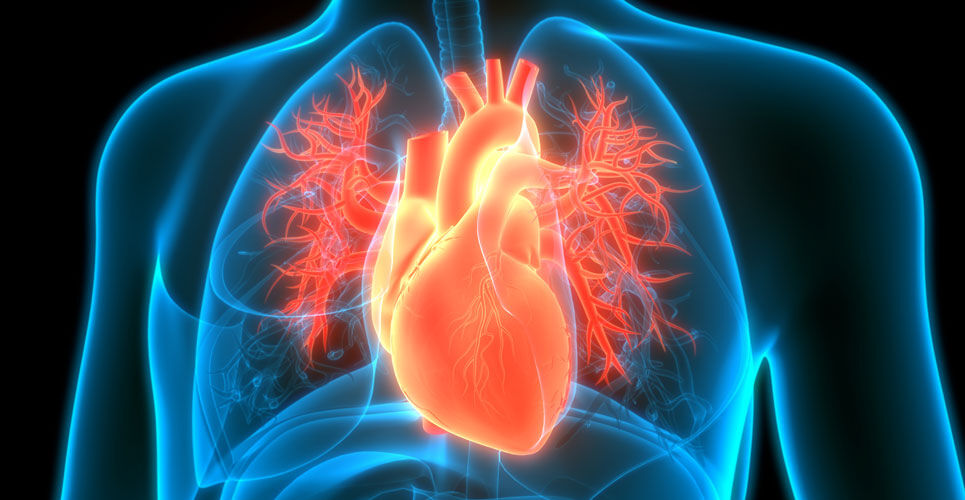

# How dangerous is Heart Failure?

**Progressive Nature:** Heart failure is often a progressive condition, meaning it can worsen over time if not effectively treated. Early diagnosis and intervention are crucial in managing the disease.

**Complications:** Untreated or poorly managed heart failure can lead to complications such as kidney damage, liver damage, and fluid buildup in the lungs (pulmonary edema), which can be life-threatening.

**Reduced Quality of Life:** Heart failure can significantly impact a person's quality of life due to symptoms like shortness of breath, fatigue, and limitations on physical activities.

**Increased Risk of Mortality:** In advanced stages, heart failure can increase the risk of mortality.


## Can it Prevented?

**Preventing Heart Problems through Early Detection and Regular Checkups**

By catching potential issues early and considering risk factors, you can even prevent heart problems with a simple checkup.

Regular health checkups, especially for your heart, help find any problems before they become serious. If we know about issues early, we can take action to stop them from getting worse. Simple changes like eating healthy, staying active, and avoiding smoking can make a big difference in keeping your heart healthy.


## What are the Risk Factors that have been Considered?

1. **Anemia:**
   Anemia happens when you don't have enough red blood cells, making you feel tired and affecting your heart's oxygen levels. Taking care of anemia is important for your energy and heart health.

2. **Creatinine Phosphokinase (CPK):**
   CPK is an enzyme in muscles, especially the heart. High CPK levels may mean your muscles, including the heart, are damaged. Checking CPK regularly helps catch possible heart issues early.

3. **Diabetes:**
   Diabetes is a long-term condition that makes your blood vessels narrow, raising the risk of heart disease. Managing diabetes is crucial for your heart health and overall well-being.

4. **Ejection Fraction:**
   Ejection fraction measures how well your heart pumps blood. A lower ejection fraction suggests your heart may be struggling. Monitoring this helps catch potential heart problems.

5. **High Blood Pressure:**
   Consistently high blood pressure harms your heart and increases the chance of heart problems. Controlling blood pressure is vital to keep your heart healthy.

6. **Platelets:**
   Platelets help your blood clot. If they're not right, it can affect blood flow and cause issues like blood clots. Monitoring platelet health is crucial to prevent complications.

7. **Serum Creatinine:**
   Serum creatinine checks if your kidneys are working well by measuring a waste product from muscles. Monitoring it helps detect early signs of kidney issues.

8. **Serum Sodium:**
   Serum sodium keeps the right balance of fluids in your body, affecting blood pressure and how your heart works. Monitoring it is important for heart health.

9. **Smoking:**
   Smoking is bad for your heart. It damages blood vessels, reduces oxygen, and makes heart problems more likely. Quitting smoking is a big step toward a healthier heart.


# Reading the DataSet

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.shape

(299, 13)

In [16]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Identifying  Outliers

In [18]:
df['creatinine_phosphokinase'].describe() 

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

In [19]:
df['creatinine_phosphokinase'].skew()  #Highly positive Skew. 

4.463110084653752

In [20]:
df['creatinine_phosphokinase'].kurt()  #Very very High number outliers. 

25.1490461965808

creatinine_phosphokinase coulumn should be pre-processed.

In [22]:
df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

In [23]:
df['ejection_fraction'].skew()

0.5553827516973211

In [24]:
df['ejection_fraction'].kurt()

0.0414093598193892

This coulumn is normally distributed. No changes needed.

In [26]:
df['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [27]:
df['platelets'].skew()

1.4623208382757793

In [28]:
df['platelets'].kurt()

6.209254515302208

This Data is also highly skewd and has Heavy tails. Needs some changes.

In [30]:
df['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

In [31]:
df['serum_creatinine'].skew()

4.455995882049026

In [32]:
df['serum_creatinine'].kurt()

25.828238661132016

This Data is also highly skewd and has Heavy tails. Needs some changes.

In [34]:
df['serum_sodium'].describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

In [35]:
df['serum_sodium'].skew()

-1.0481360160574988

In [36]:
df['serum_sodium'].kurt()

4.119712007624292

This Data is also highly skewd and has Heavy tails. Needs some changes.

# Data-Preprocessing


In [39]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

No missing values. So, We just  manupilate according to statistical Analysis.

### 1. Handling 'creatinine_phosphokinase' Column's Outliers.

In [42]:
Q1 = df['creatinine_phosphokinase'].quantile(0.25)
Q3 = df['creatinine_phosphokinase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers1 = df[(df['creatinine_phosphokinase'] >= lower_bound) & (df['creatinine_phosphokinase'] <= upper_bound)]

In [43]:
print("Skewness:", df_no_outliers1['creatinine_phosphokinase'].skew())
print("Kurtosis:", df_no_outliers1['creatinine_phosphokinase'].kurt())

Skewness: 1.0298739136593333
Kurtosis: 0.3210453307370926


### 2. Handling 'platelets' Column's Outliers.

In [45]:
Q1 = df['platelets'].quantile(0.25)
Q3 = df['platelets'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2 = df[(df['platelets'] >= lower_bound) & (df['platelets'] <= upper_bound)]

In [46]:
print(df2['platelets'].skew(),df2['platelets'].kurt())

0.18905842968804226 -0.16985944765362904


### 3. Handling 'serum_creatinine' Column's Outliers.

In [48]:
Q1 = df['serum_creatinine'].quantile(0.30)
Q3 = df['serum_creatinine'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers3 = df[(df['serum_creatinine'] >= lower_bound) & (df['serum_creatinine'] <= upper_bound)]

In [49]:
print(df_no_outliers3['serum_creatinine'].skew(),df_no_outliers3['serum_creatinine'].kurt())

0.8286276407278744 0.23790101019104481


### 4. Fixing 0's and 1's.

In [51]:
df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})

In [52]:
df['anaemia']= df['anaemia'].replace({1: 'Yes', 0: 'No'})

In [53]:
df['diabetes'] = df['diabetes'].map({1: 'Diabetic', 0: 'Non-Diabetic'})

In [54]:
df['smoking'] = df['smoking'].map({1: 'Smoker', 0: 'Non-Smoker'})

In [55]:
df['high_blood_pressure'] = df['high_blood_pressure'].map({1: 'High BP', 0: 'Normal'})

In [56]:
df['DEATH_EVENT'] = df['DEATH_EVENT'].map({1: 'Dead', 0: 'Alive'})

In [57]:
df['platelets'] = df['platelets'] / 1000

In [58]:
df.rename(columns={'platelets': 'kilo_platelets','high_blood_pressure': 'blood_pressure'})

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,blood_pressure,kilo_platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,Non-Diabetic,20,High BP,265.00000,1.9,130,Male,Non-Smoker,4,Dead
1,55.0,No,7861,Non-Diabetic,38,Normal,263.35803,1.1,136,Male,Non-Smoker,6,Dead
2,65.0,No,146,Non-Diabetic,20,Normal,162.00000,1.3,129,Male,Smoker,7,Dead
3,50.0,Yes,111,Non-Diabetic,20,Normal,210.00000,1.9,137,Male,Non-Smoker,7,Dead
4,65.0,Yes,160,Diabetic,20,Normal,327.00000,2.7,116,Female,Non-Smoker,8,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,No,61,Diabetic,38,High BP,155.00000,1.1,143,Male,Smoker,270,Alive
295,55.0,No,1820,Non-Diabetic,38,Normal,270.00000,1.2,139,Female,Non-Smoker,271,Alive
296,45.0,No,2060,Diabetic,60,Normal,742.00000,0.8,138,Female,Non-Smoker,278,Alive
297,45.0,No,2413,Non-Diabetic,38,Normal,140.00000,1.4,140,Male,Smoker,280,Alive


# Visualization

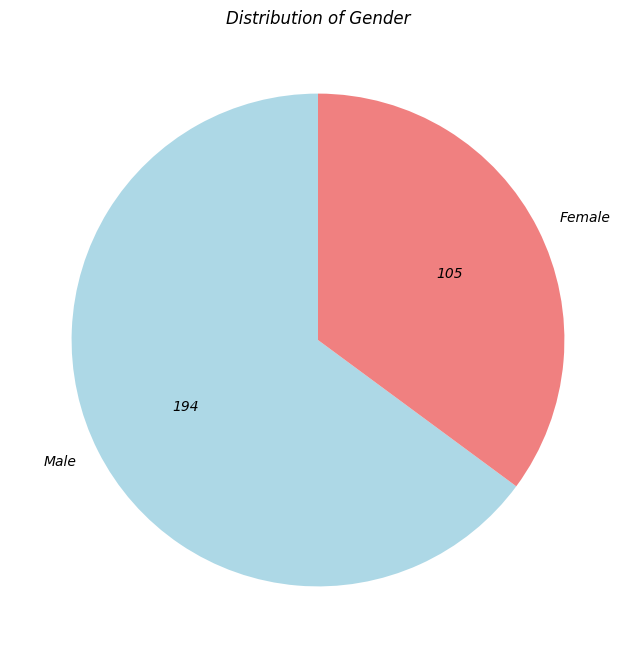

In [60]:
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(sex_counts) / 100), startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.show()

**The pie chart clearly shows the distribution of genders in the dataset, making it easy to see the difference between males and females.**

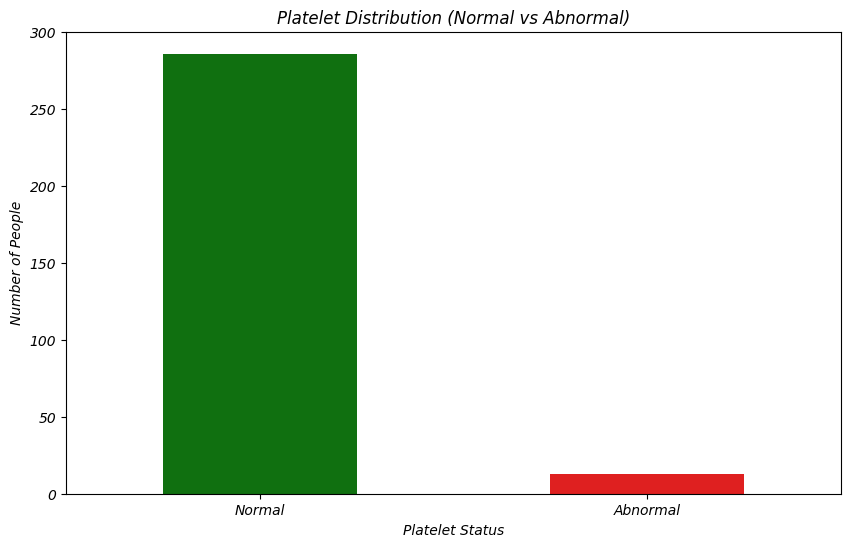

In [62]:
normal_range_start = 150
normal_range_end = 450
df['platelet_status'] = pd.cut(df['platelets'], bins=[-float('inf'), normal_range_end, float('inf')], labels=['Normal', 'Abnormal'], ordered=False)
platelet_counts = df['platelet_status'].value_counts(dropna=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=platelet_counts.index, y=platelet_counts.values, hue=platelet_counts.index, palette=['green', 'red'], width=0.5, legend=False)
plt.title('Platelet Distribution (Normal vs Abnormal)')
plt.xlabel('Platelet Status')
plt.ylabel('Number of People')
plt.show()

**The prevailing trend in the dataset reveals a significant majority of patients boasting platelet counts within the normal range, specifically between 150K to 400K.**

**This notable consistency emphasizes the widespread occurrence of healthy platelet counts among the population under consideration.**

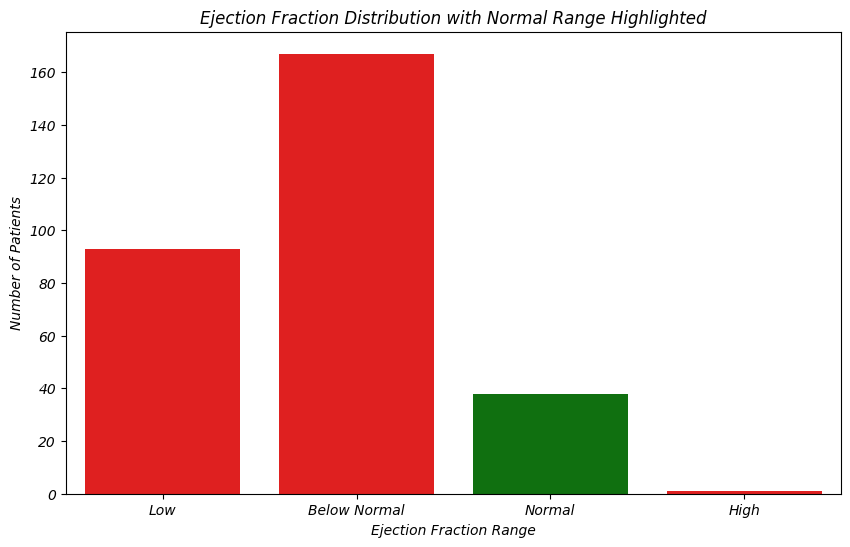

In [64]:
bin_edges = [0, 30, 50, 70, 100]
bin_labels = ['Low', 'Below Normal', 'Normal', 'High']
df['ejection_fraction_bins'] = pd.cut(df['ejection_fraction'], bins=bin_edges, labels=bin_labels, ordered=False)
bin_counts = df['ejection_fraction_bins'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_counts.index, y=bin_counts.values, hue=bin_counts.index, palette=['red', 'red', 'green', 'red'], legend=False)
plt.xlabel('Ejection Fraction Range')
plt.ylabel('Number of Patients')
plt.title('Ejection Fraction Distribution with Normal Range Highlighted')
plt.show()

**The bar plot reveals a substantial proportion of individuals with abnormal ejection fraction levels, signaling a significant deviation from the norm.**

**This finding emphasizes the need for a detailed exploration of potential health implications associated with abnormal ejection fraction in this sizable subset of the population.**

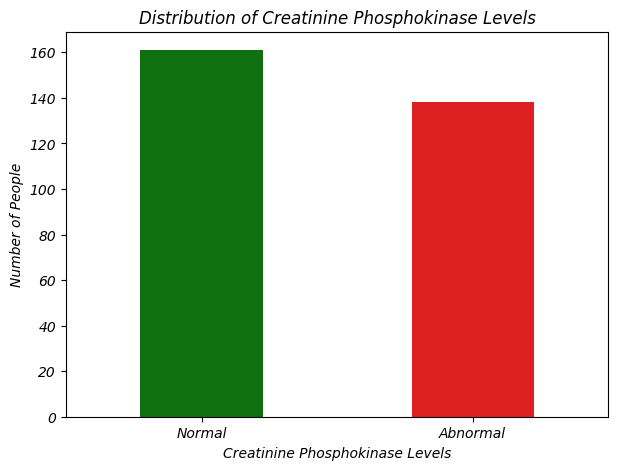

In [66]:
bins = [0, 300, float('inf')]
df['cpk_category'] = pd.cut(df['creatinine_phosphokinase'], bins=bins, labels=['Normal', 'Abnormal'], ordered=False)
cpk_counts = df['cpk_category'].value_counts(dropna=False)
plt.figure(figsize=(7, 5))
sns.barplot(x=cpk_counts.index, y=cpk_counts.values, hue=cpk_counts.index, palette=['green', 'red'], width=0.45, legend=False)
plt.title('Distribution of Creatinine Phosphokinase Levels')
plt.xlabel('Creatinine Phosphokinase Levels')
plt.ylabel('Number of People')
plt.show()

**The bar plot reveals a substantial finding, indicating that more than half of the individuals exhibit abnormal creatinine phosphokinase levels.**

**This noteworthy observation underscores a significant proportion of the population with deviations from the expected range, warranting attention and further investigation into potential health implications associated with elevated creatinine phosphokinase levels.**

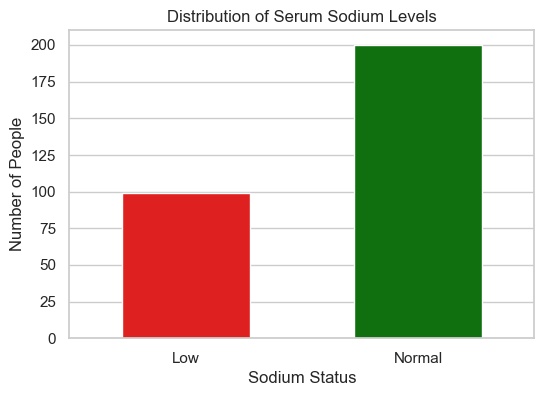

In [68]:
df['sodium_status'] = pd.cut(df['serum_sodium'], bins=[0, 135, float('inf')], labels=['Low', 'Normal'], ordered=False)
sodium_counts = df['sodium_status'].value_counts(dropna=False)
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=sodium_counts.index, y=sodium_counts.values, hue=sodium_counts.index, palette=['red', 'green'], saturation=0.75, width=0.55, legend=False)
plt.title('Distribution of Serum Sodium Levels')
plt.xlabel('Sodium Status')
plt.ylabel('Number of People')
plt.show()

**The bar plot underscores a prevailing pattern where the majority of individuals exhibit normal sodium status. However, it draws attention to a substantial deviation as around 100 people present with abnormal sodium levels.**

**This observation signals a noteworthy subset of the population with deviations from the norm, prompting consideration for additional investigation into potential health implications.**

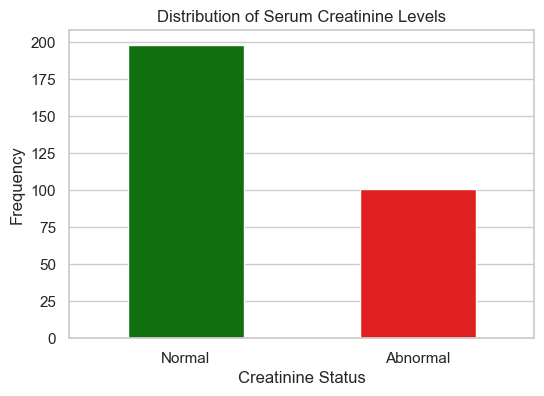

In [70]:
df['creatinine_status'] = pd.cut(df['serum_creatinine'], bins=[0, 1.2, float('inf')], labels=['Normal', 'Abnormal'], ordered=False)
creatinine_counts = df['creatinine_status'].value_counts(dropna=False)
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=creatinine_counts.index, y=creatinine_counts.values, hue=creatinine_counts.index, palette=['green', 'red'], saturation=0.75, width=0.5, legend=False)
plt.title('Distribution of Serum Creatinine Levels')
plt.xlabel('Creatinine Status')
plt.ylabel('Frequency')
plt.show()

**The bar plot underscores a predominant trend of individuals with normal creatinine status, signaling a commonality among the majority.**

**It draws attention to a noteworthy anomaly as around 100 individuals exhibit abnormal creatinine levels, indicating a substantial subset with potential health concerns warranting further investigation.**

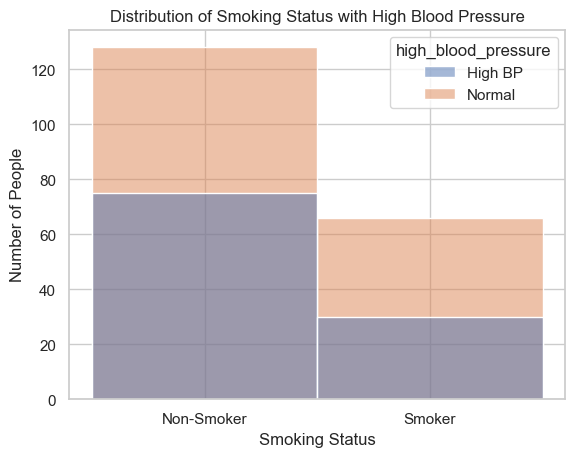

In [72]:
sns.histplot(hue='high_blood_pressure',x='smoking',data=df)
plt.title('Distribution of Smoking Status with High Blood Pressure')
plt.xlabel('Smoking Status')
plt.ylabel('Number of People')
plt.show()

**The histogram reveals a balanced distribution in both smokers and non-smokers, suggesting a comparable spread of data across the two groups.**

**This symmetry in the spread underscores an equitable representation, providing insights into the similarity in certain characteristics among individuals, irrespective of their smoking status.**

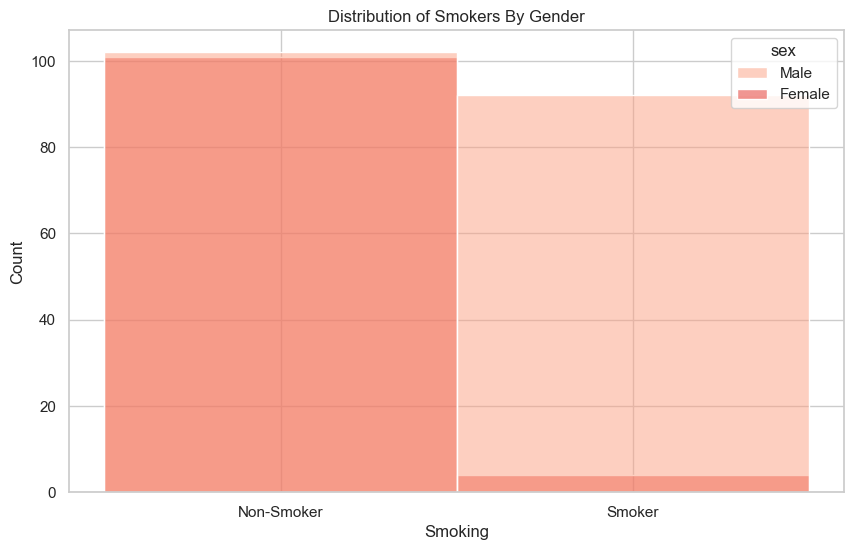

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(x='smoking', data=df, hue='sex', palette='Reds')
plt.title('Distribution of Smokers By Gender')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

**This clear depiction serves as a visual insight into the distinct distribution of smoking habits among men and women within the dataset.**

**In examining the distribution of smoking habits, the histogram underscores a marked predominance of male smokers, accompanied by a negligible representation of females engaging in smoking behavior.**

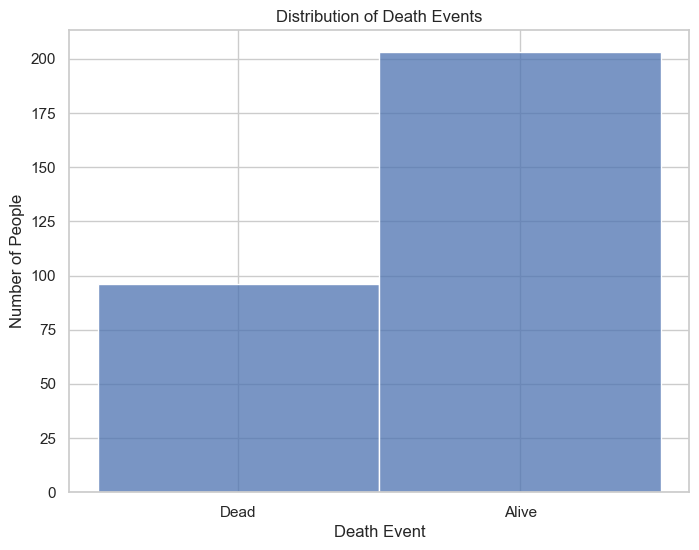

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='DEATH_EVENT')
plt.title('Distribution of Death Events')
plt.xlabel('Death Event')
plt.ylabel('Number of People')
plt.show()

**The histogram reveals that a greater number of individuals are alive compared to those who have passed away, as evidenced by the ratio of for the respective categories.**

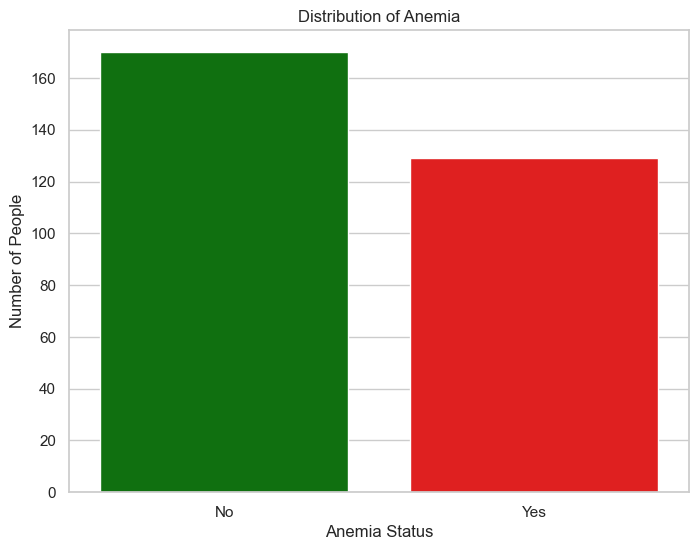

In [78]:
anemia_counts = df['anaemia'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=anemia_counts.index, y=anemia_counts.values, hue=anemia_counts.index, palette=['green', 'red'], legend=False)
plt.title('Distribution of Anemia')
plt.xlabel('Anemia Status')
plt.ylabel('Number of People')
plt.show()

**The bar plot illustrates the prevalence of anemia among respondents, providing a clear visualization of its distribution based on affirmative and negative responses.**

**Over 120 individuals have affirmed experiencing the condition of anemia by responding positively.**

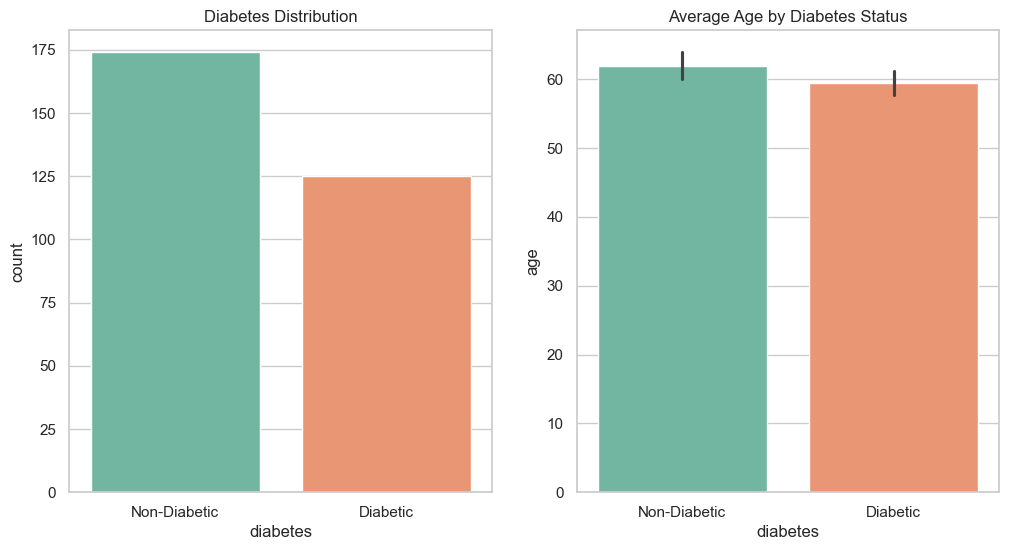

In [80]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='diabetes', hue='diabetes', data=df, palette='Set2', legend=False)
plt.title('Diabetes Distribution')
plt.subplot(1, 2, 2)
sns.barplot(x='diabetes', y='age', hue='diabetes', data=df, palette='Set2', errorbar=('ci', 95), legend=False)
plt.title('Average Age by Diabetes Status')
plt.show()

**The following bar plots reveal relationships between Diabetes distribution and Age.**

**People with diabetes are more likely to be older than people without diabetes. The average age of people with diabetes is around 55, while the average age of people without diabetes is around 65.**

**There are more people with non-diabetic diabetes than diabetic diabetes.**

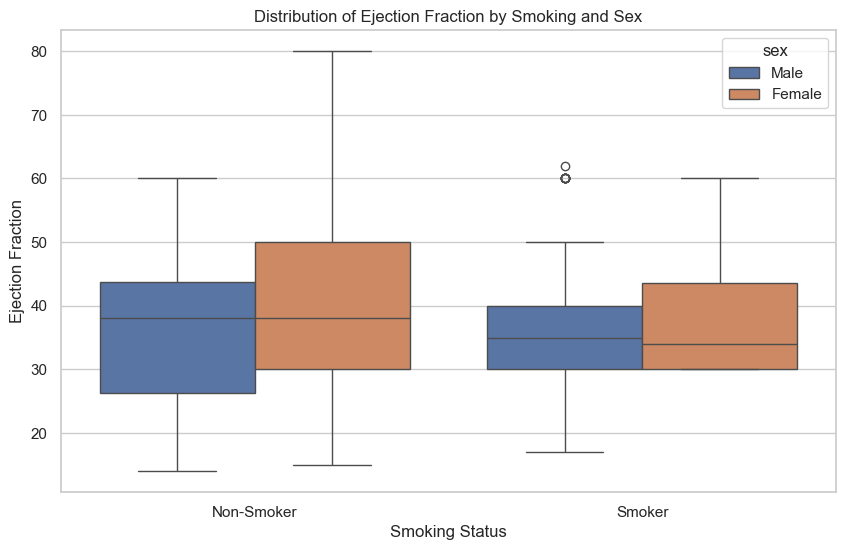

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking', y='ejection_fraction', hue='sex', data=df)
plt.title('Distribution of Ejection Fraction by Smoking and Sex')
plt.xlabel('Smoking Status')
plt.ylabel('Ejection Fraction')
plt.show()

**The following box plot reveals gender-based disparities in ejection fractions.**

**Overall, males tend to have higher ejection fractions than females, as seen by the generally higher medians and boxes for males.**

**Smokers tend to have lower ejection fractions than non-smokers, regardless of sex, as indicated by the lower medians and boxes for smokers.**

**The variability in ejection fraction appears to be slightly higher for smokers than non-smokers, as suggested by the wider boxes and whiskers.**

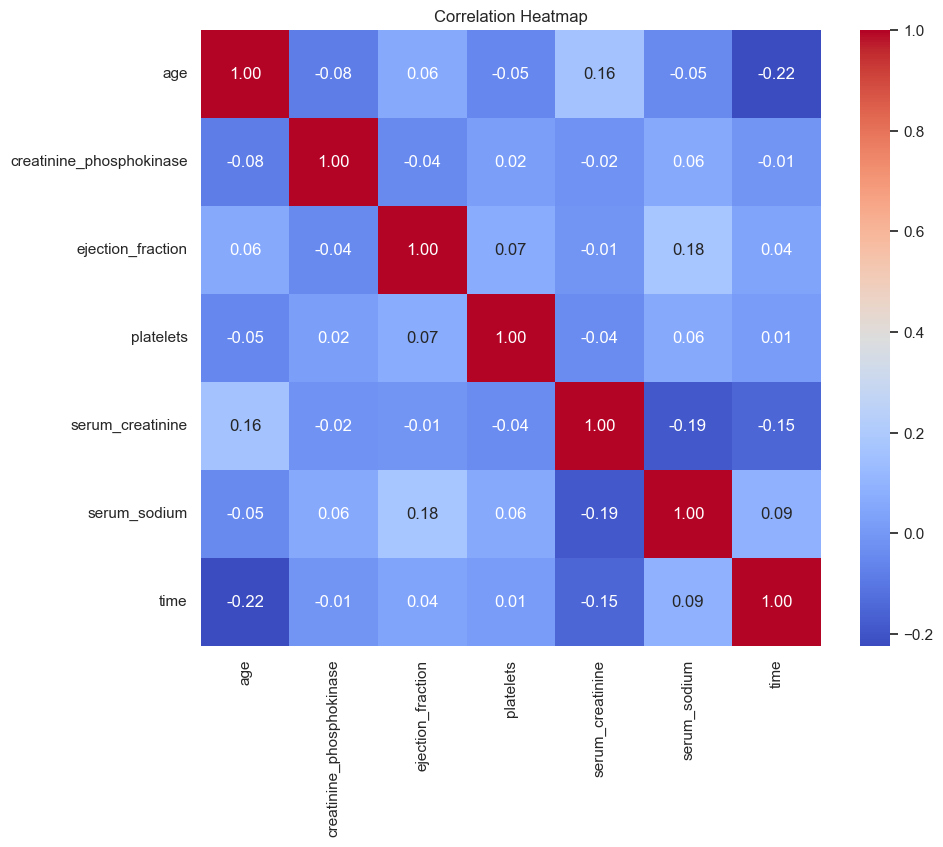

In [84]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**The presented visualization is a Correlation Heatmap, offering insights into the relationships between various categorized data pairs within the dataset.**

**The color gradient, ascending from bottom to top, signifies both the strength and direction of correlations. Shades of red indicate positive correlations, while shades of blue denote negative correlations.**

**The heatmap reveals significant correlations with coefficients such as -0.22, -0.19, 0.16, and 0.18, indicating the strength of associations among different aspects of people's health, specifically factors related to heart health. These coefficients are associated with variables such as CPK levels, ejection fraction, serum sodium levels, age, and time during the observed period.**

**The negative coefficients (-0.22 and -0.19) suggest a negative correlation, indicating a potential inverse relationship between certain health factors. Conversely, the positive coefficients (0.16 and 0.18) suggest a positive correlation, highlighting potential associations between other health variables.**

# Conclusion



In conclusion, heart failure is a progressive medical condition that, if left untreated, can lead to severe complications and a reduced quality of life. The risk of mortality increases in advanced stages of the disease. Early detection and intervention are crucial in managing heart failure, and regular checkups play a vital role in preventing and monitoring potential issues.

Several key health parameters, such as anemia, creatinine phosphokinase (CPK) levels, diabetes, ejection fraction, high blood pressure, platelet count, serum creatinine, serum sodium, and smoking status, are essential indicators of heart health. Monitoring these factors can help identify and address potential problems before they become serious.

Notably, the majority of patients exhibit normal platelet counts, but a substantial proportion presents abnormal ejection fraction and CPK levels. Additionally, over 100 individuals show abnormal sodium and creatinine levels, emphasizing the importance of regular health assessments.

The distribution of platelet counts, ejection fractions, and CPK levels varies among smokers and non-smokers, with smokers generally displaying lower ejection fractions. Furthermore, the histogram indicates a greater number of individuals alive than those who have passed away, emphasizing the significance of early detection and intervention in managing heart failure.

In the context of demographics, it's observed that smokers are predominantly male, and there is a notable age difference between individuals with and without diabetes. Overall, the data underscores the importance of lifestyle modifications, regular health monitoring, and early intervention in promoting heart health and mitigating the risks associated with heart failure.

# References

1.https://hospitalpharmacyeurope.com/wp-content/uploads/2023/02/Dapagliflozin-approved-in-EU-for-heart-failure-across-full-ejection-fraction-spectrum.jpg